In [40]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    print("AAAAAAAAAAAAA")
    print(x)
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result

from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

<IPython.core.display.Math object>

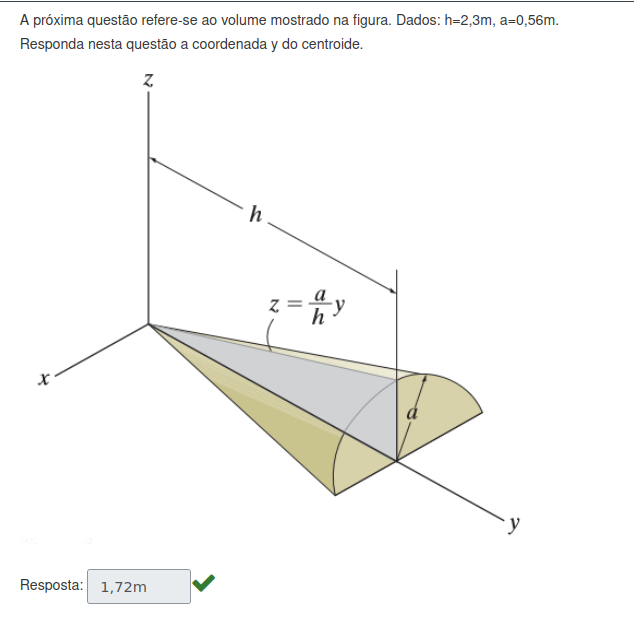

In [41]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [42]:
%%write_and_run inputs/{questao}.py
h=2.3
a=0.56


#referencia
F=700
w=150
MC=800
a=8
b=4
c=6


In [43]:
%%write_and_run resolutions/{questao}.py
ycm=3/4*h 
zcm=a/np.pi
resposta(ycm,'m')

AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'ycm=3/4*h', 'zcm=a/np.pi', "resposta(ycm,'m')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
ycm,1.72
zcm,0.18


A resposta final é:


1.725m

In [44]:
#cylindrical coordinates
r,y,theta=sy.symbols(r'r y \theta')
V=sy.integrate(sy.integrate(sy.integrate(r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))
ycm=sy.integrate(sy.integrate(sy.integrate(y*r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))/V
rcm=sy.integrate(sy.integrate(sy.integrate(r*r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(rcm)

3/4
1/2


In [45]:
#cartesian coordinates
x = sy.symbols("x", real=True)
y = sy.symbols("y", real=True, positive=True)
z=sy.sqrt(y**2-x**2)
V=(sy.integrate(sy.integrate(z,(x,-y,y)),(y,0,1)))
ycm=(sy.integrate(sy.integrate(z*y,(x,-y,y)),(y,0,1)))/V
zcm=(sy.integrate(sy.integrate(z**2/2,(x,-y,y)),(y,0,1)))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(zcm)

3/4
1/pi


In [46]:
#cartesian coordinates
x = sy.symbols("x", real=True)
y = sy.symbols("y", real=True, positive=True)
a = sy.symbols("a", real=True,positive=True)
h = sy.symbols("h", real=True, positive=True)
z=sy.sqrt((a/h*y)**2-x**2)
V=(sy.integrate(sy.integrate(z,(x,-y*a/h,y*a/h)),(y,0,h)))
ycm=(sy.integrate(sy.integrate(z*y,(x,-y*a/h,y*a/h)),(y,0,h)))/V
zcm=(sy.integrate(sy.integrate(z**2/2,(x,-y*a/h,y*a/h)),(y,0,h)))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(zcm)

3*h/4
a/pi


<IPython.core.display.Math object>

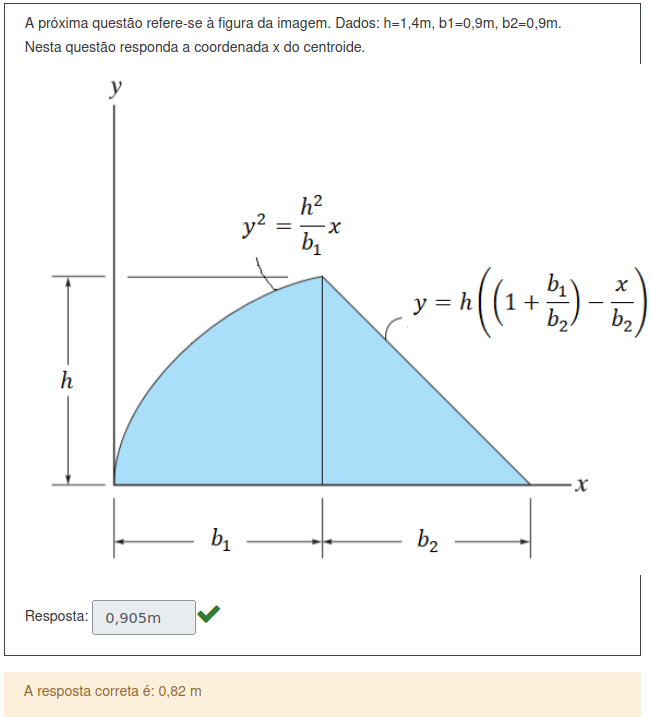

In [47]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [48]:
%%write_and_run inputs/{questao}.py
h=1.4 
b1=0.9 
b2=0.9


#referencia
b1=1
b2=1
h=1


In [49]:
%%write_and_run resolutions/{questao}.py
#b1,b2,h,x,y=sy.symbols('b1 b2 h x y')
y=sy.symbols('y')
x1=b1*y**2/h**2
x2=(-y/h+(1+b1/b2))*b2
V=sy.integrate((x2-x1),(y,0,h))
ycminf=y
xcminf=(x2+x1)/2
ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V
xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V
resposta(xcm,'m')


AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', "#b1,b2,h,x,y=sy.symbols('b1b2hxy')", "y=sy.symbols('y')", 'x1=b1*y**2/h**2', 'x2=(-y/h+(1+b1/b2))*b2', 'V=sy.integrate((x2-x1),(y,0,h))', 'ycminf=y', 'xcminf=(x2+x1)/2', 'ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V', 'xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V', "resposta(xcm,'m')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
y,y
x1,0.459183673469388*y**2
x2,1.8 - 0.642857142857143*y
V,1.47000000000000
ycminf,y
xcminf,0.229591836734694*y**2 - 0.321428571428571*y +...
ycm,0.500000000000000
xcm,0.822857142857143


A resposta final é:


0.823m

<IPython.core.display.Math object>

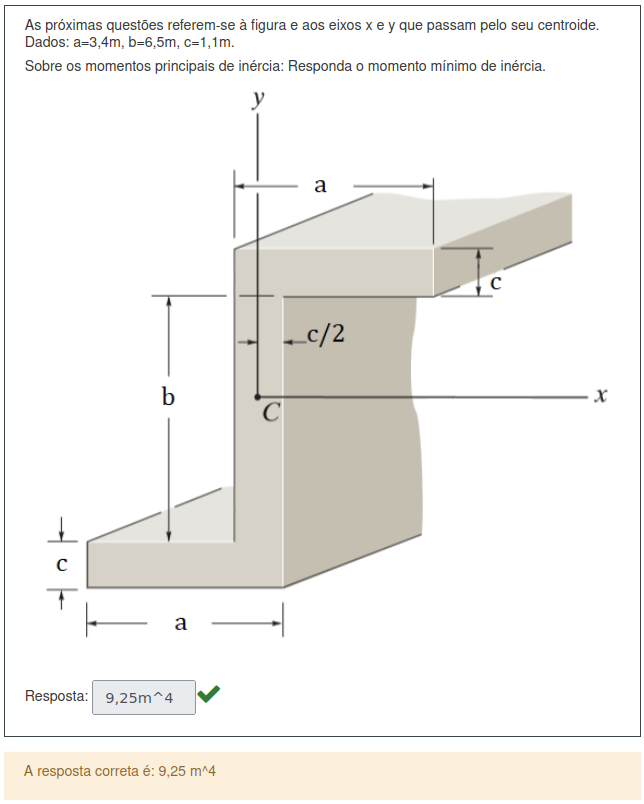

In [50]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [51]:
%%write_and_run inputs/{questao}.py
a=3.4 
b=6.5 
c=1.1



#referencia
a=4
b=5
c=1



#referencia 2
a=400
b=400
c=100

In [52]:
%%write_and_run resolutions/{questao}.py

l1=a-c
h1=c
A1=l1*h1 
dx1=a/2
dy1=b/2+c/2
IAxy1=A1*dx1*dy1
Ibxy1=0
Ibx1=l1*h1**3/12
Iby1=l1**3*h1/12
IAx1=A1*dy1**2
IAy1=A1*dx1**2
Ix1=IAx1+Ibx1
Iy1=IAy1+Iby1
Ixy1=IAxy1+Ibxy1

l2=c
h2=b+2*c
A2=l2*h2
dx2=0
dy2=0 
IAxy2=0
Ibxy2=0
IAx2=A2*dy2**2
IAy2=A2*dx2**2
Ibx2=l2*h2**3/12
Iby2=l2**3*h2/12
Ix2=IAx2+Ibx2
Iy2=IAy2+Iby2
Ixy2=IAxy2+Ibxy2

l3=a-c
h3=c
A3=l3*h3
dx3=-a/2
dy3=-b/2-c/2
IAxy3=A3*dx3*dy3
Ibxy3=0
Ibx3=l3*h3**3/12
Iby3=l3**3*h3/12
IAx3=A3*dy3**2
IAy3=A3*dx3**2
Ix3=IAx3+Ibx3
Iy3=IAy3+Iby3
Ixy3=IAxy3+Ibxy3

Ix=Ix1+Ix2+Ix3 
Iy=Iy1+Iy2+Iy3 
Ixy=Ixy1+Ixy2+Ixy3

IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
resposta(IxyMin,'m^4') 


AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', '', 'l1=a-c', 'h1=c', 'A1=l1*h1', 'dx1=a/2', 'dy1=b/2+c/2', 'IAxy1=A1*dx1*dy1', 'Ibxy1=0', 'Ibx1=l1*h1**3/12', 'Iby1=l1**3*h1/12', 'IAx1=A1*dy1**2', 'IAy1=A1*dx1**2', 'Ix1=IAx1+Ibx1', 'Iy1=IAy1+Iby1', 'Ixy1=IAxy1+Ibxy1', '', 'l2=c', 'h2=b+2*c', 'A2=l2*h2', 'dx2=0', 'dy2=0', 'IAxy2=0', 'Ibxy2=0', 'IAx2=A2*dy2**2', 'IAy2=A2*dx2**2', 'Ibx2=l2*h2**3/12', 'Iby2=l2**3*h2/12', 'Ix2=IAx2+Ibx2', 'Iy2=IAy2+Iby2', 'Ixy2=IAxy2+Ibxy2', '', 'l3=a-c', 'h3=c', 'A3=l3*h3', 'dx3=-a/2', 'dy3=-b/2-c/2', 'IAxy3=A3*dx3*dy3', 'Ibxy3=0', 'Ibx3=l3*h3**3/12', 'Iby3=l3**3*h3/12', 'IAx3=A3*dy3**2', 'IAy3=A3*dx3**2', 'Ix3=IAx3+Ibx3', 'Iy3=IAy3+Iby3', 'Ixy3=IAxy3+Ibxy3', '', 'Ix=Ix1+Ix2+Ix3', 'Iy=Iy1+Iy2+Iy3', 'Ixy=Ixy1+Ixy2+Ixy3', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', "resposta(IxyMin,'m^4')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
l1,2.30
h1,1.10
A1,2.53
dx1,1.70
dy1,3.80
IAxy1,16.34
Ibxy1,0.00
Ibx1,0.26
Iby1,1.12
IAx1,36.53


A resposta final é:


9.250m^4

<IPython.core.display.Math object>

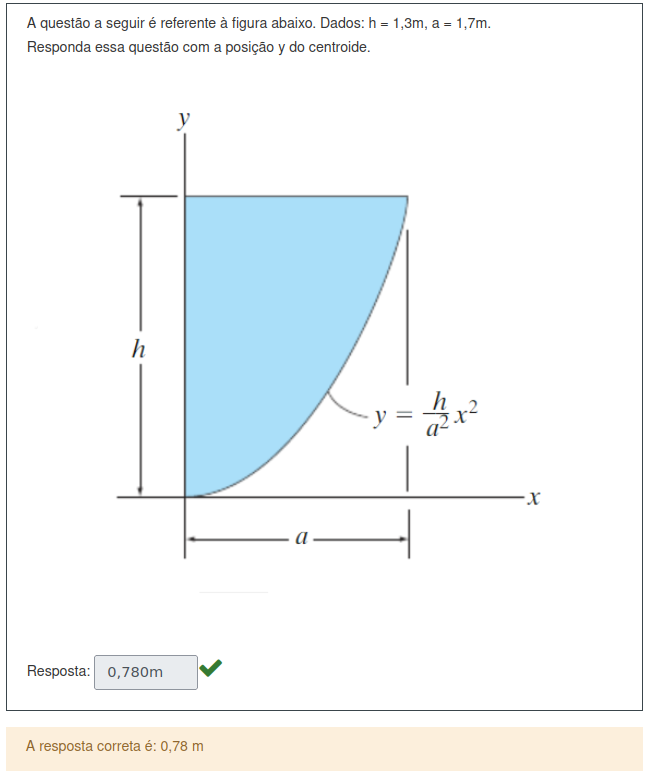

In [53]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [54]:
%%write_and_run inputs/{questao}.py
h=1.3
a=1.7

#referencia


In [55]:
%%write_and_run resolutions/{questao}.py
ycm=3/5*h 
xcm=3/8*a
resposta(ycm,'m')


AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'ycm=3/5*h', 'xcm=3/8*a', "resposta(ycm,'m')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
ycm,0.78
xcm,0.64


A resposta final é:


0.780m

<IPython.core.display.Math object>

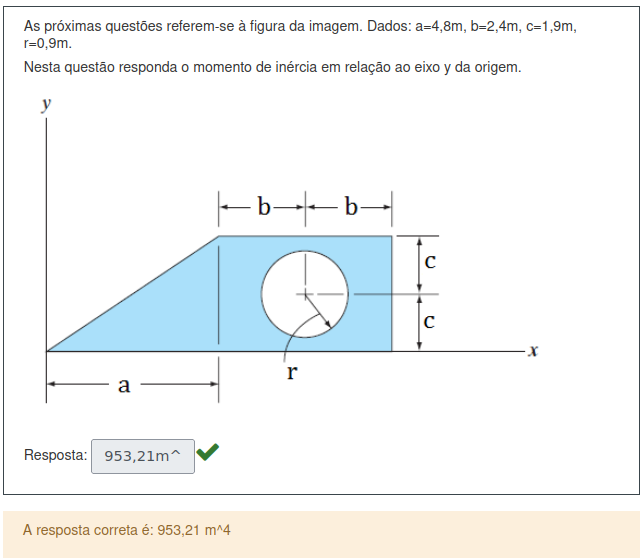

In [56]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [57]:
%%write_and_run inputs/{questao}.py
a=4.8
b=2.4
c=1.9
r=0.9



#referencias
a=300
b=150
c=100
r=75


#Referencia




In [58]:
%%write_and_run resolutions/{questao}.py
h1=2*c
l1=a
dx=2/3*a
Iby1=l1**3*h1/36
A1=h1*l1/2
Iy1=Iby1+A1*dx**2
Iby2=np.pi*r**4/4 
A2=np.pi*r**2 
dx2=a+b
Iy2=Iby2+A2*dx2**2
l3=2*b 
h3=2*c
Iby3=l1**3*h1/12 
A3=l3*h3
dx3=a+b 
Iy3=Iby3+A3*dx3**2 
Iy=Iy1+Iy3-Iy2

x1cm=2/3*a 
y1cm=(2*c)/3
x2cm=a+b
y2cm=c 

xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))
ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))

resposta(Iy,'m^4') 



AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'h1=2*c', 'l1=a', 'dx=2/3*a', 'Iby1=l1**3*h1/36', 'A1=h1*l1/2', 'Iy1=Iby1+A1*dx**2', 'Iby2=np.pi*r**4/4', 'A2=np.pi*r**2', 'dx2=a+b', 'Iy2=Iby2+A2*dx2**2', 'l3=2*b', 'h3=2*c', 'Iby3=l1**3*h1/12', 'A3=l3*h3', 'dx3=a+b', 'Iy3=Iby3+A3*dx3**2', 'Iy=Iy1+Iy3-Iy2', '', 'x1cm=2/3*a', 'y1cm=(2*c)/3', 'x2cm=a+b', 'y2cm=c', '', 'xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))', 'ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))', '', "resposta(Iy,'m^4')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
h1,3.80
l1,4.80
dx,3.20
Iby1,11.67
A1,9.12
Iy1,105.06
Iby2,0.52
A2,2.54
dx2,7.20
Iy2,132.43


A resposta final é:


953.213m^4

<IPython.core.display.Math object>

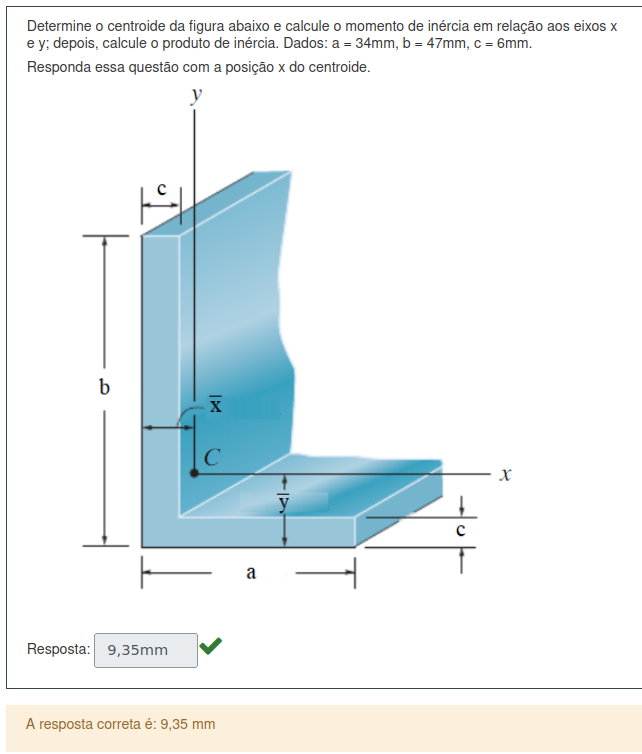

In [59]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [60]:
%%write_and_run inputs/{questao}.py
a=34 
b=47 
c=6


In [61]:

#referencia
c=5
b=50
a=30


In [62]:
%%write_and_run resolutions/{questao}.py 
xcm1=c/2 
ycm1=(b+c)/2 
b1=c 
h1=b-c 
A1=b1*h1 

xcm2=a/2 
ycm2=c/2
b2=a 
h2=c 
A2=b2*h2

xcm=(A1*xcm1+A2*xcm2)/(A1+A2)
ycm=(A1*ycm1+A2*ycm2)/(A1+A2) 

##### 1

Ibx1=b1*h1**3/12
Iby1=b1**3*h1/12

dy1=-ycm+ycm1 
dx1=-xcm+xcm1

Ix1=Ibx1+A1*dy1**2 
Iy1=Iby1+A1*dx1**2 
Ixy1=A1*dx1*dy1

###### 2

Ibx2=b2*h2**3/12
Iby2=b2**3*h2/12

dx2=-xcm+xcm2 
dy2=-ycm+ycm2 

Iy2=Iby2+A2*dx2**2 
Ix2=Ibx2+A2*dy2**2 
Ixy2=A2*dx2*dy2

## ALL

Ix=Ix1+Ix2 
Iy=Iy1+Iy2 
Ixy=Ixy1+Ixy2


IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
theta=sy.atan(2*Ixy/(Iy-Ix))/2
thetadeg=theta*180/np.pi
resposta(xcm,'mm')



AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'xcm1=c/2', 'ycm1=(b+c)/2', 'b1=c', 'h1=b-c', 'A1=b1*h1', '', 'xcm2=a/2', 'ycm2=c/2', 'b2=a', 'h2=c', 'A2=b2*h2', '', 'xcm=(A1*xcm1+A2*xcm2)/(A1+A2)', 'ycm=(A1*ycm1+A2*ycm2)/(A1+A2)', '', '#####1', '', 'Ibx1=b1*h1**3/12', 'Iby1=b1**3*h1/12', '', 'dy1=-ycm+ycm1', 'dx1=-xcm+xcm1', '', 'Ix1=Ibx1+A1*dy1**2', 'Iy1=Iby1+A1*dx1**2', 'Ixy1=A1*dx1*dy1', '', '######2', '', 'Ibx2=b2*h2**3/12', 'Iby2=b2**3*h2/12', '', 'dx2=-xcm+xcm2', 'dy2=-ycm+ycm2', '', 'Iy2=Iby2+A2*dx2**2', 'Ix2=Ibx2+A2*dy2**2', 'Ixy2=A2*dx2*dy2', '', '##ALL', '', 'Ix=Ix1+Ix2', 'Iy=Iy1+Iy2', 'Ixy=Ixy1+Ixy2', '', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'theta=sy.atan(2*Ixy/(Iy-Ix))/2', 'thetadeg=theta*180/np.pi', "resposta(xcm,'mm')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm1,2.5
ycm1,27.5
b1,5
h1,45
A1,225
xcm2,15.0
ycm2,2.5
b2,30
h2,5
A2,150


A resposta final é:


7.500mm

<IPython.core.display.Math object>

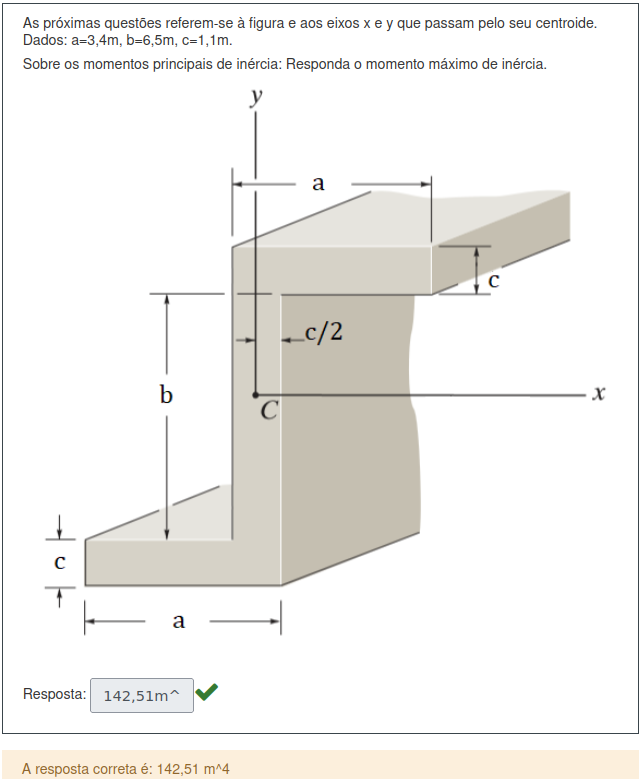

In [63]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [64]:
%%write_and_run inputs/{questao}.py
a=3.4 
b=6.5 
c=1.1


#referencia
a=4
b=5
c=1

#referencia 2
a=400
b=400
c=100

In [65]:
%%write_and_run resolutions/{questao}.py

l1=a-c
h1=c
A1=l1*h1 
dx1=a/2
dy1=b/2+c/2
IAxy1=A1*dx1*dy1
Ibxy1=0
Ibx1=l1*h1**3/12
Iby1=l1**3*h1/12
IAx1=A1*dy1**2
IAy1=A1*dx1**2
Ix1=IAx1+Ibx1
Iy1=IAy1+Iby1
Ixy1=IAxy1+Ibxy1

l2=c
h2=b+2*c
A2=l2*h2
dx2=0
dy2=0 
IAxy2=0
Ibxy2=0
IAx2=A2*dy2**2
IAy2=A2*dx2**2
Ibx2=l2*h2**3/12
Iby2=l2**3*h2/12
Ix2=IAx2+Ibx2
Iy2=IAy2+Iby2
Ixy2=IAxy2+Ibxy2

l3=a-c
h3=c
A3=l3*h3
dx3=-a/2
dy3=-b/2-c/2
IAxy3=A3*dx3*dy3
Ibxy3=0
Ibx3=l3*h3**3/12
Iby3=l3**3*h3/12
IAx3=A3*dy3**2
IAy3=A3*dx3**2
Ix3=IAx3+Ibx3
Iy3=IAy3+Iby3
Ixy3=IAxy3+Ibxy3

Ix=Ix1+Ix2+Ix3 
Iy=Iy1+Iy2+Iy3 
Ixy=Ixy1+Ixy2+Ixy3

IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
resposta(IxyMax,'m^4') 


AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', '', 'l1=a-c', 'h1=c', 'A1=l1*h1', 'dx1=a/2', 'dy1=b/2+c/2', 'IAxy1=A1*dx1*dy1', 'Ibxy1=0', 'Ibx1=l1*h1**3/12', 'Iby1=l1**3*h1/12', 'IAx1=A1*dy1**2', 'IAy1=A1*dx1**2', 'Ix1=IAx1+Ibx1', 'Iy1=IAy1+Iby1', 'Ixy1=IAxy1+Ibxy1', '', 'l2=c', 'h2=b+2*c', 'A2=l2*h2', 'dx2=0', 'dy2=0', 'IAxy2=0', 'Ibxy2=0', 'IAx2=A2*dy2**2', 'IAy2=A2*dx2**2', 'Ibx2=l2*h2**3/12', 'Iby2=l2**3*h2/12', 'Ix2=IAx2+Ibx2', 'Iy2=IAy2+Iby2', 'Ixy2=IAxy2+Ibxy2', '', 'l3=a-c', 'h3=c', 'A3=l3*h3', 'dx3=-a/2', 'dy3=-b/2-c/2', 'IAxy3=A3*dx3*dy3', 'Ibxy3=0', 'Ibx3=l3*h3**3/12', 'Iby3=l3**3*h3/12', 'IAx3=A3*dy3**2', 'IAy3=A3*dx3**2', 'Ix3=IAx3+Ibx3', 'Iy3=IAy3+Iby3', 'Ixy3=IAxy3+Ibxy3', '', 'Ix=Ix1+Ix2+Ix3', 'Iy=Iy1+Iy2+Iy3', 'Ixy=Ixy1+Ixy2+Ixy3', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', "resposta(IxyMax,'m^4')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
l1,2.30
h1,1.10
A1,2.53
dx1,1.70
dy1,3.80
IAxy1,16.34
Ibxy1,0.00
Ibx1,0.26
Iby1,1.12
IAx1,36.53


A resposta final é:


142.509m^4

<IPython.core.display.Math object>

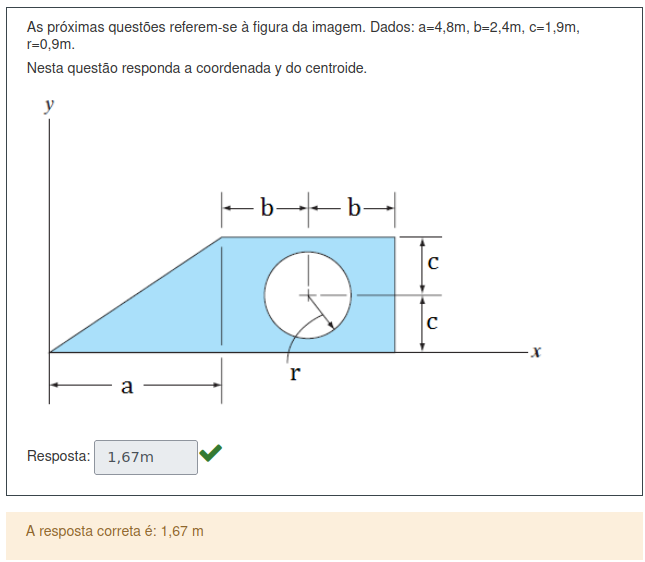

In [66]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [67]:
%%write_and_run inputs/{questao}.py
a=4.8
b=2.4
c=1.9
r=0.9



#referencias
a=300
b=150
c=100
r=75

In [68]:
%%write_and_run resolutions/{questao}.py
h1=2*c
l1=a
dx=2/3*a
Iby1=l1**3*h1/36
A1=h1*l1/2
Iy1=Iby1+A1*dx**2
Iby2=np.pi*r**4/4 
A2=np.pi*r**2 
dx2=a+b
Iy2=Iby2+A2*dx2**2
l3=2*b 
h3=2*c
Iby3=l1**3*h1/12 
A3=l3*h3
dx3=a+b 
Iy3=Iby3+A3*dx3**2 
Iy=Iy1+Iy3-Iy2

x1cm=2/3*a 
y1cm=(2*c)/3
x2cm=a+b
y2cm=c 

xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))
ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))

resposta(ycm,'m') 



AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'h1=2*c', 'l1=a', 'dx=2/3*a', 'Iby1=l1**3*h1/36', 'A1=h1*l1/2', 'Iy1=Iby1+A1*dx**2', 'Iby2=np.pi*r**4/4', 'A2=np.pi*r**2', 'dx2=a+b', 'Iy2=Iby2+A2*dx2**2', 'l3=2*b', 'h3=2*c', 'Iby3=l1**3*h1/12', 'A3=l3*h3', 'dx3=a+b', 'Iy3=Iby3+A3*dx3**2', 'Iy=Iy1+Iy3-Iy2', '', 'x1cm=2/3*a', 'y1cm=(2*c)/3', 'x2cm=a+b', 'y2cm=c', '', 'xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))', 'ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))', '', "resposta(ycm,'m')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
h1,3.80
l1,4.80
dx,3.20
Iby1,11.67
A1,9.12
Iy1,105.06
Iby2,0.52
A2,2.54
dx2,7.20
Iy2,132.43


A resposta final é:


1.667m

<IPython.core.display.Math object>

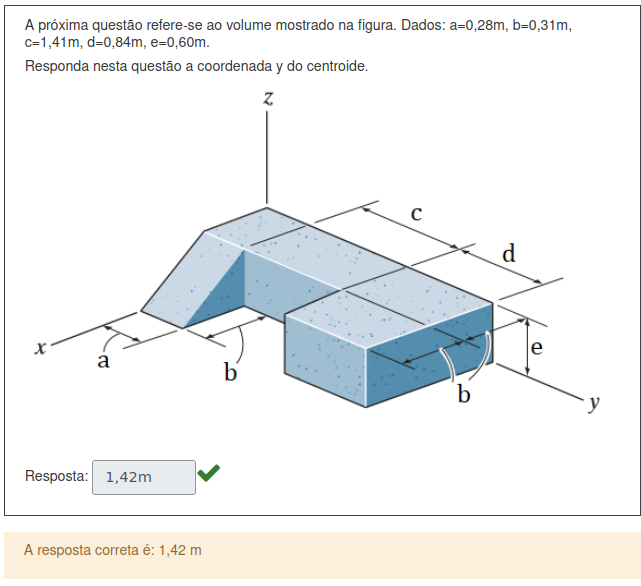

In [69]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [70]:
%%write_and_run inputs/{questao}.py
a=0.28 
b=0.31 
c=1.41 
d=0.84 
e=0.60


#referencia
a=100
b=150
c=250
d=200
e=150


In [71]:
%%write_and_run resolutions/{questao}.py
xcm= 2*a*b**2*e/(3*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + 3*b**2*d*e/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b**2*e*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
ycm= a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e*(a + c + d/2)/(a*b*e/2 + b*d*e + b*e*(a + c + d)) + b*e*(a/2 + c/2 + d/2)*(a + c + d)/(a*b*e/2 + b*d*e + b*e*(a + c + d))
zcm= a*b*e**2/(6*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e**2/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*e**2*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
resposta(ycm,'m')


AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'xcm=2*a*b**2*e/(3*(a*b*e/2+b*d*e+b*e*(a+c+d)))+3*b**2*d*e/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b**2*e*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', 'ycm=a**2*b*e/(4*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e*(a+c+d/2)/(a*b*e/2+b*d*e+b*e*(a+c+d))+b*e*(a/2+c/2+d/2)*(a+c+d)/(a*b*e/2+b*d*e+b*e*(a+c+d))', 'zcm=a*b*e**2/(6*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e**2/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*e**2*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', "resposta(ycm,'m')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,0.24
ycm,1.42
zcm,0.30


A resposta final é:


1.422m

In [72]:
%%write_and_run resolutions/{questao}.py
a,b,c,d,e=sy.symbols('a b c d e')
xcmi=[4*b/3,b/2,3*b/2]
ycmi=[a/2,(a+c+d)/2,a+c+d/2]
zcmi=[e/3,e/2,e/2]
Vi=[a*b*e/2,b*(a+c+d)*e,d*b*e]

xcm=0
ycm=0
zcm=0
for i in range(3):
    xcm+=xcmi[i]*Vi[i]/sum(Vi)
    ycm+=ycmi[i]*Vi[i]/sum(Vi)
    zcm+=zcmi[i]*Vi[i]/sum(Vi)
print('xcm=',xcm)
print('ycm=',ycm)
print('zcm=',zcm)
resposta(ycm,'m')


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


xcm= 2*a*b**2*e/(3*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + 3*b**2*d*e/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b**2*e*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
ycm= a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e*(a + c + d/2)/(a*b*e/2 + b*d*e + b*e*(a + c + d)) + b*e*(a/2 + c/2 + d/2)*(a + c + d)/(a*b*e/2 + b*d*e + b*e*(a + c + d))
zcm= a*b*e**2/(6*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e**2/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*e**2*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', "a,b,c,d,e=sy.symbols('abcde')", 'xcmi=[4*b/3,b/2,3*b/2]', 'ycmi=[a/2,(a+c+d)/2,a+c+d/2]', 'zcmi=[e/3,e/2,e/2]', 'Vi=[a*b*e/2,b*(a+c+d)*e,d*b*e]', '', 'xcm=0', 'ycm=0', 'zcm=0', 'foriinrange(3):', 'xcm+=xcmi[i]*Vi[i]/sum(Vi)', 'ycm+=ycmi[i]*Vi[i]/sum(Vi)', 'zcm+=zcmi[i]*Vi[i]/sum(Vi)', "print('xcm=',xcm)", "print('ycm=',ycm)", "print('zcm=',zcm)", "resposta(ycm,'m')", '']


,0
xcmi,"[4*b/3, b/2, 3*b/2]"
ycmi,"[a/2, a/2 + c/2 + d/2, a + c + d/2]"
zcmi,"[e/3, e/2, e/2]"
Vi,"[a*b*e/2, b*e*(a + c + d), b*d*e]"
xcm,2*a*b**2*e/(3*(a*b*e/2 + b*d*e + b*e*(a + c + ...
ycm,a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d)...
zcm,a*b*e**2/(6*(a*b*e/2 + b*d*e + b*e*(a + c + d)...


A resposta final é:


a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e*(a + c + d/2)/(a*b*e/2 + b*d*e + b*e*(a + c + d)) + b*e*(a/2 + c/2 + d/2)*(a + c + d)/(a*b*e/2 + b*d*e + b*e*(a + c + d))

In [73]:
sum([1,2,3])

6

<IPython.core.display.Math object>

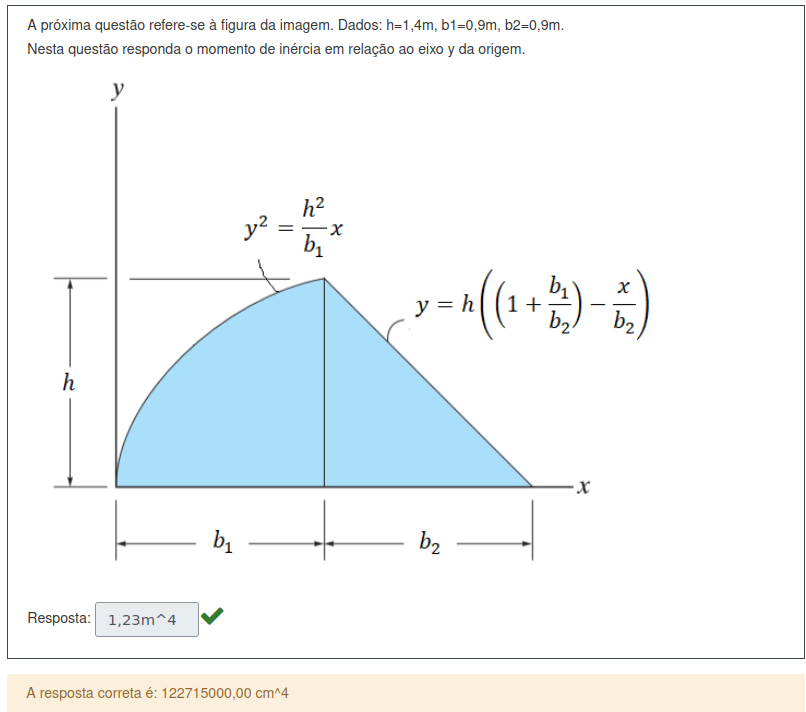

In [74]:
questao='1.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [75]:
%%write_and_run inputs/{questao}.py
h=1.4 
b1=0.9 
b2=0.9


#Referencia




In [76]:
%%write_and_run resolutions/{questao}.py
x = sy.symbols("x", real=True, positive=True) 
#h,b1,b2 = sy.symbols("h b1 b2", real=True, positive=True) 
y1=h/(b1**0.5)*x**0.5 
Iy1=sy.integrate(x**2*y1,(x,0,b1)) 
y2=h*((1+b1/b2)-x/b2) 
Iy2=sy.simplify(sy.integrate(x**2*y2,(x,b1,b1+b2)))
Iy=Iy1+Iy2
resposta(Iy,'m^4')



AAAAAAAAAAAAA
['%%write_and_runresolutions/{questao}.py', 'x=sy.symbols("x",real=True,positive=True)', '#h,b1,b2=sy.symbols("hb1b2",real=True,positive=True)', 'y1=h/(b1**0.5)*x**0.5', 'Iy1=sy.integrate(x**2*y1,(x,0,b1))', 'y2=h*((1+b1/b2)-x/b2)', 'Iy2=sy.simplify(sy.integrate(x**2*y2,(x,b1,b1+b2)))', 'Iy=Iy1+Iy2', "resposta(Iy,'m^4')", '']


/tmp/ipykernel_23592/1763029030.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
y1,1.47572957474524*x**0.5
Iy1,0.291600000000000
y2,2.8 - 1.55555555555556*x
Iy2,0.935550000000000
Iy,1.22715000000000


A resposta final é:


1.227m^4

<IPython.core.display.Math object>

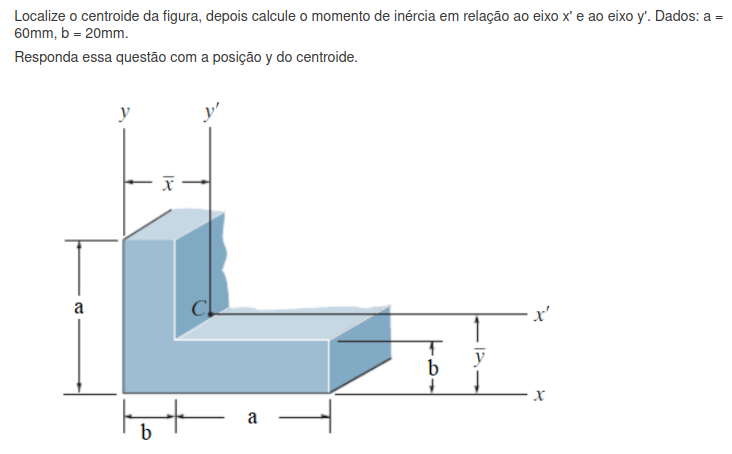

In [77]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [78]:
%%write_and_run inputs/{questao}.py


UsageError: %%write_and_run is a cell magic, but the cell body is empty.



#Referencia




In [ ]:
%%write_and_run resolutions/{questao}.py




<IPython.core.display.Math object>

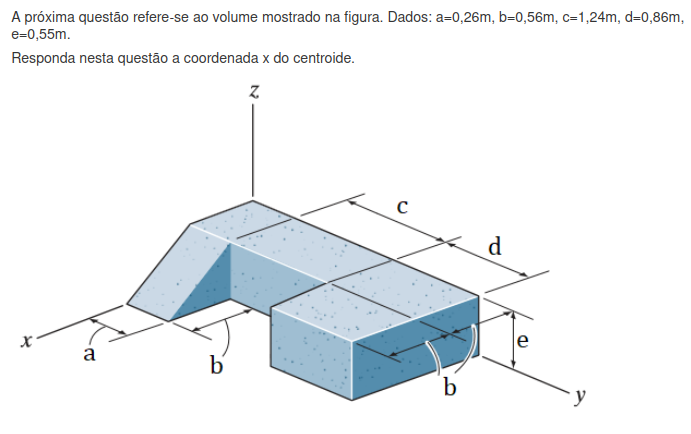

In [ ]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

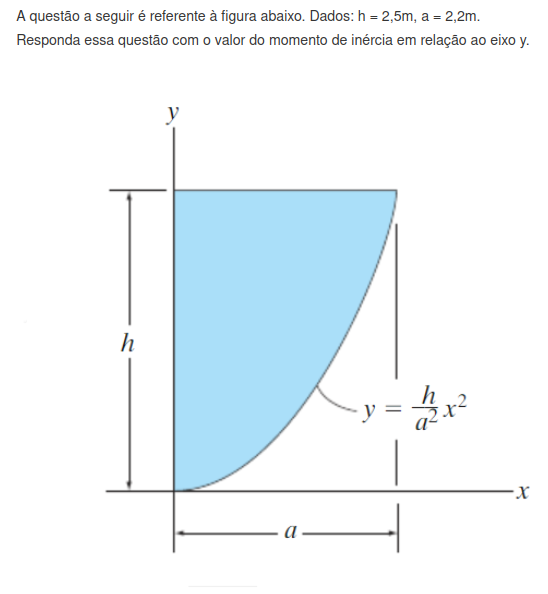

In [ ]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

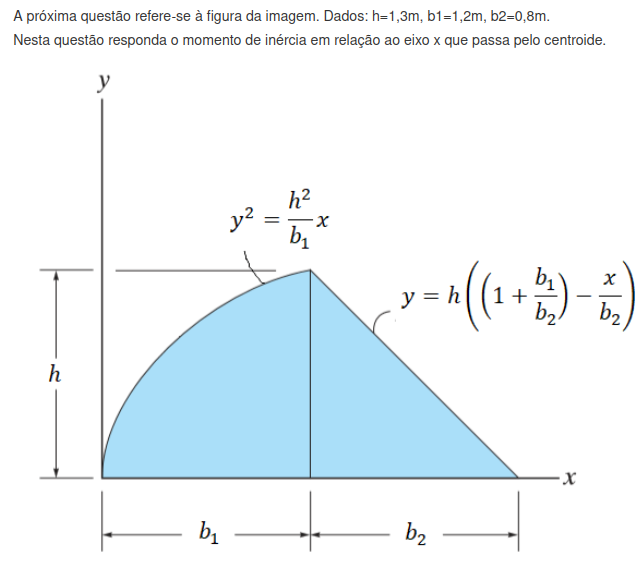

In [ ]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

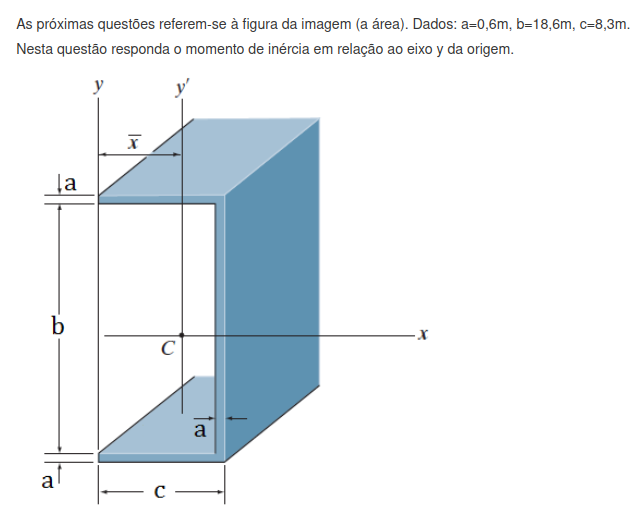

In [ ]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

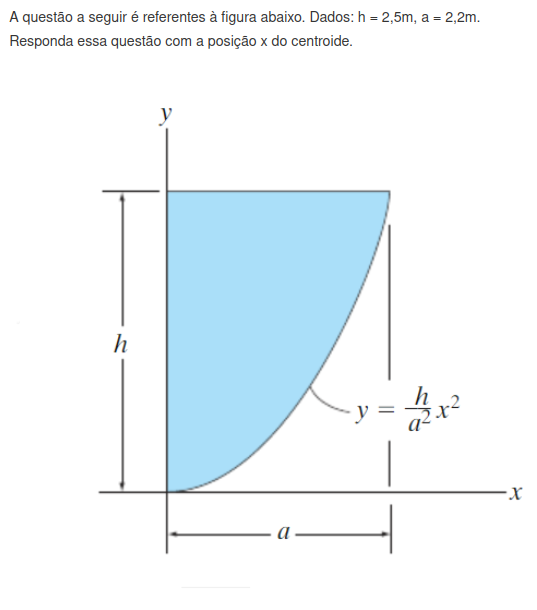

In [ ]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

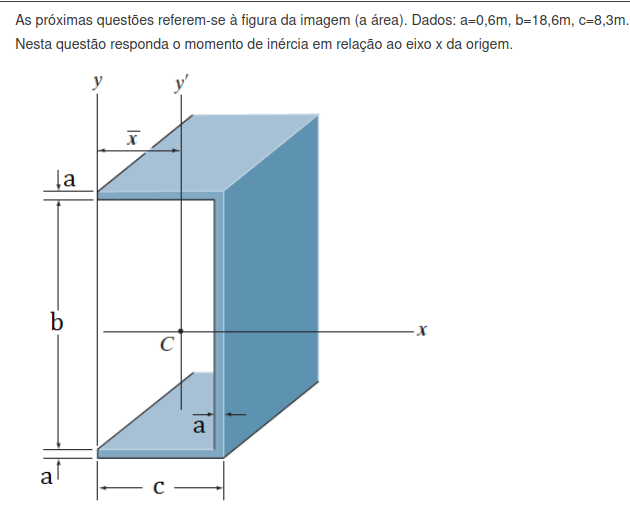

In [ ]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

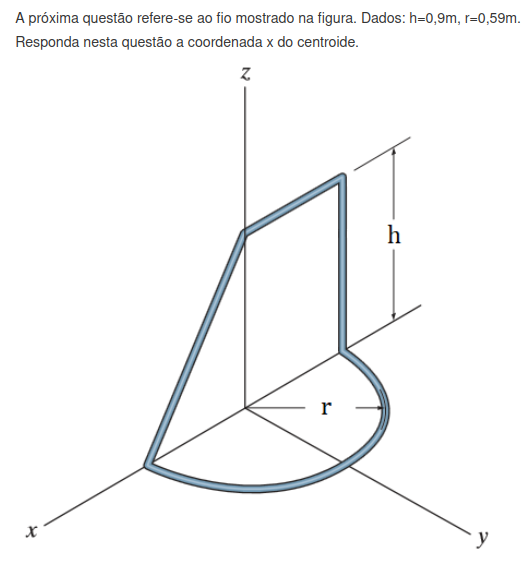

In [ ]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

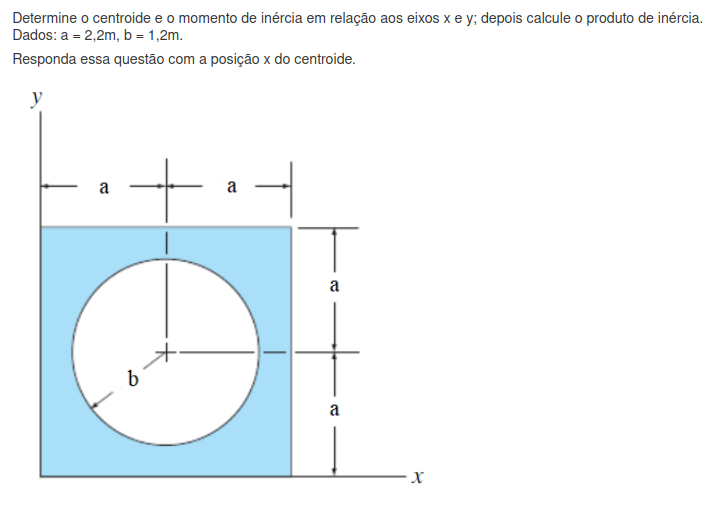

In [ ]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

<IPython.core.display.Math object>

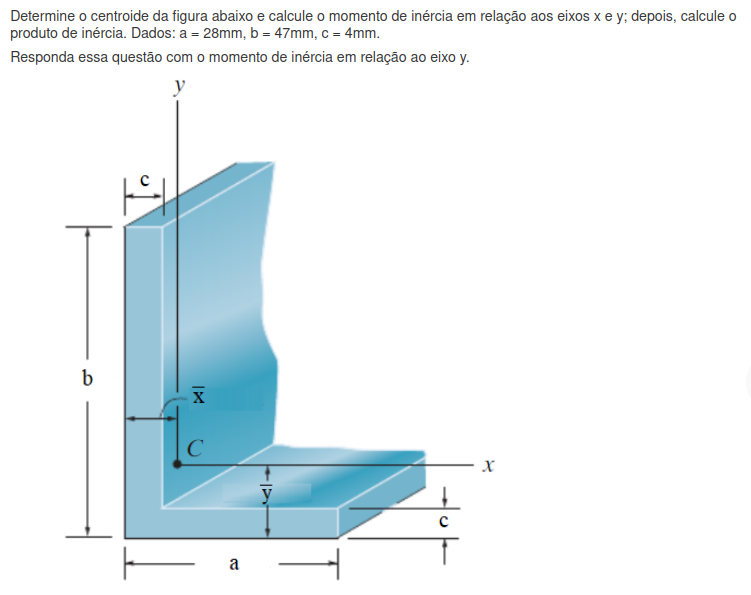

In [ ]:
questao='2.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 